In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd
from pydataset import data

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Sklearn Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


# Sklearn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.cluster import KMeans


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate
from sklearn.tree import export_graphviz

# Custom Module's
from wrangle import wrangle
from acquire import acquire, get_target, get_data_dictionary

import warnings
warnings.filterwarnings("ignore")

# Project Planning

### Project and Goals

### Starting Hypotheses

### The Plan

#### Setup

- Create a repo
- Create a README.md
- Update .gitignore
- Create a draft and final in juypter notebook

#### Acquire

- Create an acquire.py module
- Create a sql script
- Setup acquire.py
- Use python/sql to grab the data from codeup database
- plot distributions
- Run .head(), .info(), .describe()

#### Prepare

- Create a prepare.py module

- Clean data()
   - Drop columns
       - Document why I dropped columns
   - Handle nulls
       - Documnet which columns/rows will be dropped.
       - Impute? document how and why
   - Check datatypes
   - Check for duplicates
   - Rename columns
   
- Remove outliers()
    
- Split Data for modeling()
    - Encode()
        - Create dummies
        - Scale Data on Train
        - Transform Train, Validate, Test
        
- Split Data for exploration()
    - No encoding
    
#### Explore

- Ask and answer as many questions as i can
- Create a Heatmap
- Convert some continous values to categorical
- Look at univariate graphs and bivariate graphs
- Create initial hypothesis
- Run some hypothesis testing
    - T-Test
    - Correlation
- Feature Engineering
- Clustering
    - Try out different features
        - Graph clusters
        - graph k using inertia

#### Model
- If clusters found, use cluster as features or For each cluster
    - Run as many linear regression models as i can.
        - Change out features
            - Document
        - Change out hyperparameters
            - Document
    - Select best model
         - Compare Validate and Train rmse and look for drop offs
         - plot residuals
    - Run test
    
#### Deliver
- Create a data dictionary
- Finish up final notebook
- Finish up READ.me

# Executive Summary - Conclusions & Next Steps

    Coming Soon

### Conclusion

    Coming Soon

### Recommendations

    Coming Soon

### Takeaways

    Coming Soon
    

# Data Acquisition

In [2]:
df = acquire()

### .info(), .head(), .describe()

In [3]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,transactiondate,id,...,censustractandblock,id.1,logerror,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,2017-01-01,1727539,...,6.059063e+13,0,0.025595,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,2017-01-01,1387261,...,6.111001e+13,1,0.055619,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2017-01-01,11677,...,6.059022e+13,2,0.005383,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2017-01-01,2288172,...,6.037300e+13,3,-0.103410,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,2017-01-01,1970746,...,6.037124e+13,4,0.006940,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77380
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   heatingorsystemtypeid         49440 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   parcelid                      77381 non-null  int64  
 8   transactiondate               77381 non-null  object 
 9   id                            77381 non-null  int64  
 10  basementsqft                  50 non-null     float64
 11  bathroomcnt                   77381 non-null  float64
 12  bedroomcnt                    77381 non-null  float64
 13  b

### Distributions - "calculatedfinishedsquarefeet", "lotsizesquarefeet", "bedroomcnt", "taxamount", "landtaxvaluedollarcnt"

<AxesSubplot:>

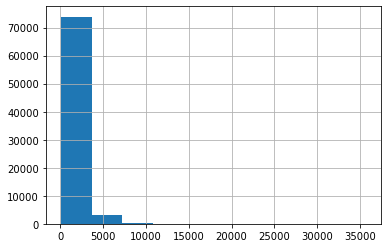

In [5]:
df.calculatedfinishedsquarefeet.hist()

<AxesSubplot:>

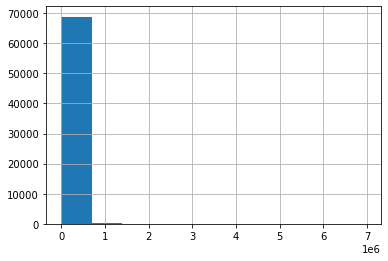

In [6]:
df.lotsizesquarefeet.hist()

<AxesSubplot:>

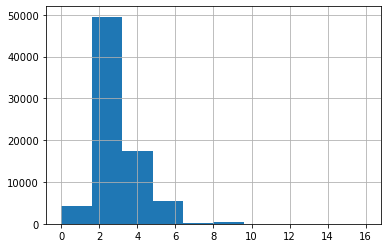

In [7]:
df.bedroomcnt.hist()

<AxesSubplot:>

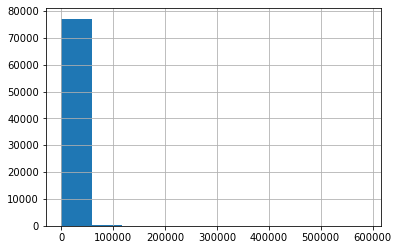

In [8]:
df.taxamount.hist()

<AxesSubplot:>

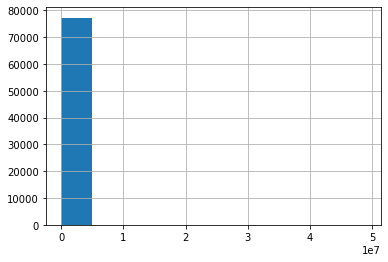

In [9]:
df.landtaxvaluedollarcnt.hist()

### Target Feature - "logerror"

In [10]:
print(get_target(df).to_markdown())

|             | Target                                        |
|:------------|:----------------------------------------------|
| Feature     | logerror                                      |
| Datatype    | 77381 non-null: float64                       |
| Description | Error rate of acutal price vs predicted price |


<AxesSubplot:>

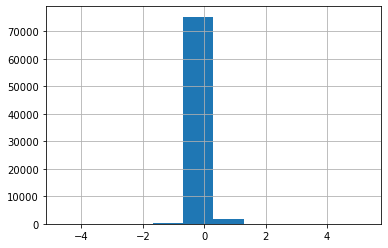

In [11]:
df.logerror.hist()

### Data Dictionary

In [12]:
print(get_data_dictionary(df).to_markdown())

| Feature                      | Datatype                | Description                                   |
|:-----------------------------|:------------------------|:----------------------------------------------|
| typeconstructiontypeid       | 222 non-null: float64   |                                               |
| storytypeid                  | 50 non-null: float64    |                                               |
| propertylandusetypeid        | 77381 non-null: float64 |                                               |
| heatingorsystemtypeid        | 49440 non-null: float64 |                                               |
| buildingclasstypeid          | 15 non-null: float64    |                                               |
| architecturalstyletypeid     | 206 non-null: float64   |                                               |
| airconditioningtypeid        | 24953 non-null: float64 |                                               |
| parcelid                     | 7738

### Data Acquisition Takeaways

Brought in roughly 77k observations and 69 features from the codeup zillow database.  These observations where filtered from 2017 properties table where the latitude and longitude were not null.  I also included only the last transaction for each property. 
   

# Data Preparation

### Clean()

Created a feature called county where it mapped out the county from the fips feature.

Using propertylandusedesc I was able to filter out only single family residentails.

Removed columns that were missing 60% of its values.

Removed rows that were missing 75% of its values.

Any row claiming ot have a unitcnt great than 1 was removed.

From heaters feature, I removed any observation that wasn't Central, Floor/Wall, or Forced air

Renamed columns

### Outlier()

Used interquartile range to remove outliers.  

List of features where outliers were removed:

- bath
- bed
- area
- lot_size
- year
- tax_amount
- tax_value

### Scaled()

I used a MinMaxScaler() on columns:

- bath
- bed
- area
- lot_size
- year
- tax_amount
- tax_value

### Split()

In [13]:
train, validate, test = wrangle()

In [14]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (29182, 12)
validate -> (12507, 12)
test -> (10423, 12)


### Data Preperation Takeaways

All observations have no null or empty values.  Ended the prep stage with only 12 features.  Data is split between train, validate, and test.

# Data Exploration & Analysis

## Explore

### explore_univariate()

### explore_bivariate()

### Explore Takeaways

## Analysis

### Original Hypothesis

### Analysis Takeaways